In [125]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib.colors import SymLogNorm, LogNorm
from astropy import units as u
import os
import org.opencv.imgproc.Imgproc;
from lxml import etree
%matplotlib inline

ModuleNotFoundError: No module named 'org'

In [2]:
def plot_skymap(file, name='skymap.png', title=None, xlabel='right ascension (deg)', 
                     ylabel='declination (deg)', figsize=(10, 10), fontsize=20, cmap='gist_heat'):
    # get map
    fig = plt.figure(figsize=figsize) 
    ax = plt.subplot(projection=wcs)
    img = plt.imshow(skymap, norm=SymLogNorm(1), interpolation='gaussian', cmap=cmap)
    ax.coords[0].set_format_unit(u.deg) 
    ax.coords[1].set_format_unit(u.deg)
    cb = plt.colorbar(img, ax=ax)
    # axis
    ax.tick_params(axis='both', labelsize=fontsize)
    cb.ax.tick_params(labelsize=fontsize) 
    cb.set_label('counts', fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.grid(color='grey', ls='solid')
    fig.tight_layout()
    return 



In [117]:
#dataset upload
data_folder = os.path.join("..", "data")
xml_folder = os.path.join("..","models")
dataset = []
i=0
bkg=0

#Order by name bkg-oneSource-twoSource
directory=os.listdir(data_folder)
directory.sort()
#print(directory)

for dir_skymap in directory:
    if(os.path.isdir(os.path.join(data_folder, dir_skymap))):        
        for crab_skymap in os.listdir(os.path.join(data_folder, dir_skymap)):
            if(dir_skymap == "backgroundSimulations"):
                bkg+=1
                i+=1
                with fits.open((os.path.join(data_folder, dir_skymap, crab_skymap))) as hdul:
                    wcs = WCS(hdul[0].header)
                    dataset.append((hdul[0].data.astype("int8"),wcs,"None"))
            else:
                with fits.open((os.path.join(data_folder, dir_skymap, crab_skymap))) as hdul:
                    wcs = WCS(hdul[0].header)
                    dataset.append((hdul[0].data.astype("int8"),wcs))
single=0
double=0
directory=os.listdir(xml_folder)
directory.sort()
#print(directory)
for xml_subfolder in directory:
    if(xml_subfolder == "sourceModels"):
        for xml_file in os.listdir(os.path.join(xml_folder, xml_subfolder)):
            tree = etree.parse((os.path.join(xml_folder, xml_subfolder, xml_file)))
            root = tree.getroot()
            Ra = root[0][1][0].get("value")
            Dec = root[0][1][1].get("value")
            dataset[i] +=((Ra,Dec),)
            i+=1
            single+=1
    if(xml_subfolder == "twoSourcesModels"):
        for xml_file in os.listdir(os.path.join(xml_folder, xml_subfolder)):
            tree = etree.parse((os.path.join(xml_folder, xml_subfolder, xml_file)))
            root = tree.getroot()
            Ra = root[0][1][0].get("value")
            Dec = root[0][1][1].get("value")
            Ra2 = root[1][1][0].get("value")
            Dec2 = root[1][1][1].get("value")
            dataset[i] +=(((Ra,Dec),(Ra2,Dec2)),)
            #dataset[i] +=(xml_file,)
            i+=1
            double+=1
#print(dataset)
print("number of total entries: ",i)
print("numebr of entries of single source: ",single)
print("number of backgrounds: ",bkg)
print("number of entries of double sources: ",double)   

number of total entries:  20
numebr of entries of single source:  10
number of backgrounds:  5
number of entries of double sources:  5


In [ ]:
#for skymap in dataset:
    #plot_skymap(skymap)

In [ ]:
#skymap = dataset[1][0]

#gamma_ray_coordinates = np.unravel_index(np.argmax(skymap), skymap.shape)

#print(gamma_ray_coordinates)

In [ ]:
#px,py = gamma_ray_coordinates
#sky = dataset[1][1].pixel_to_world(px,py)
#print(sky)  

In [ ]:
#gray = cv2.imread("index.jpeg", cv2.IMREAD_GRAYSCALE)
#plt.figure(figsize=(10,10))
#plt.imshow(gray)
#plt.show()


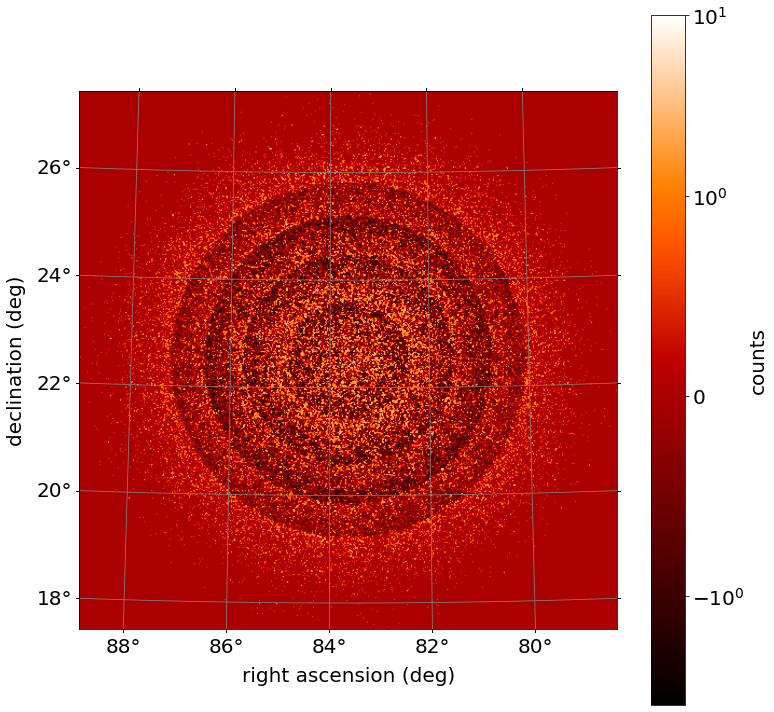

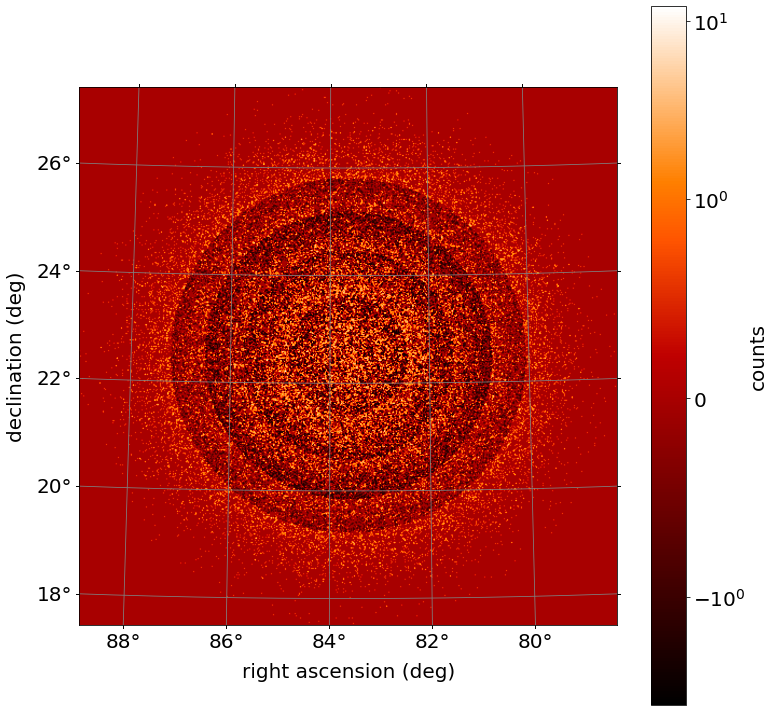

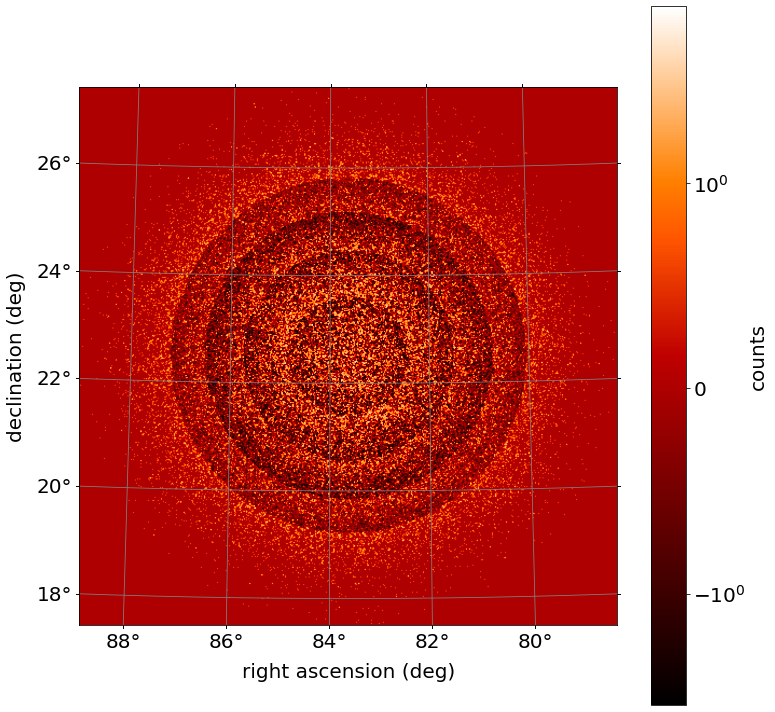

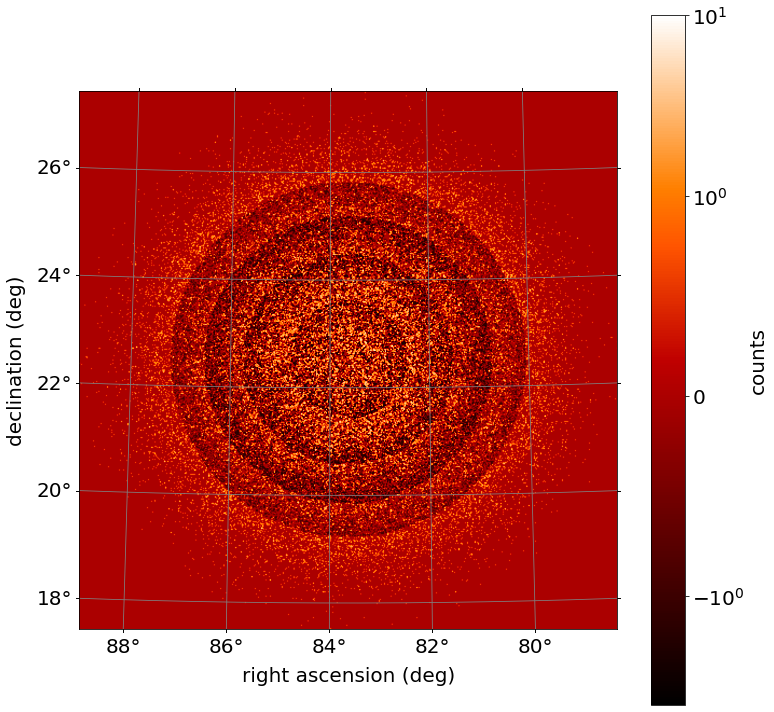

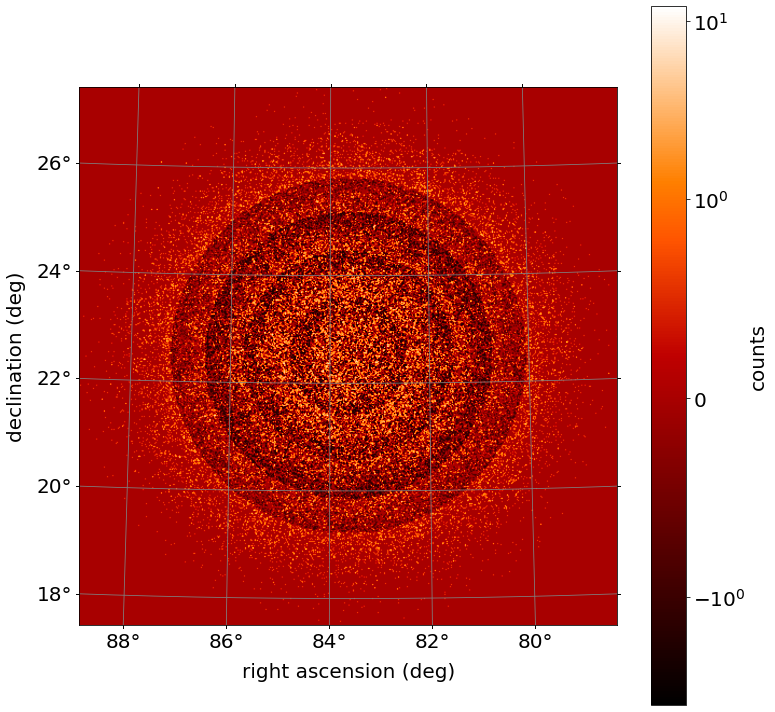

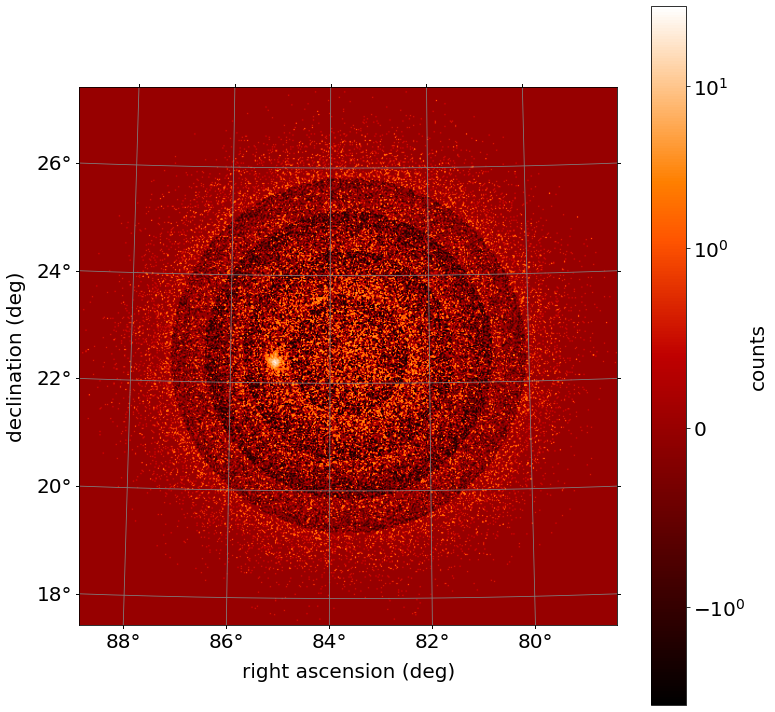

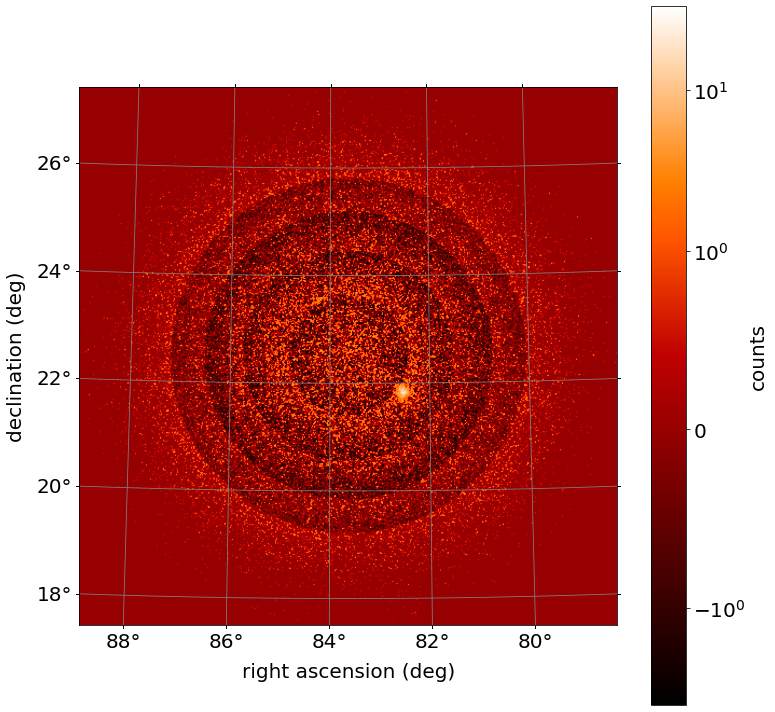

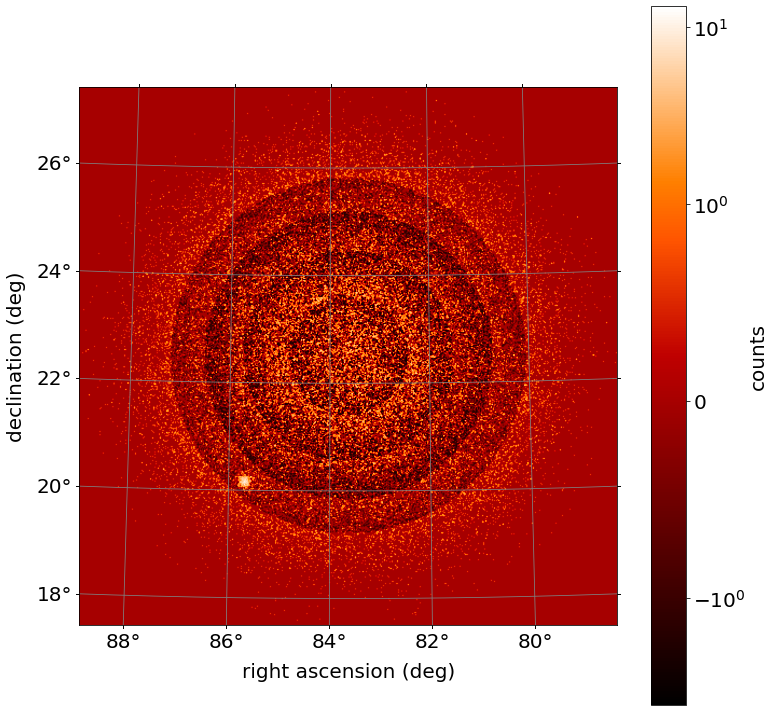

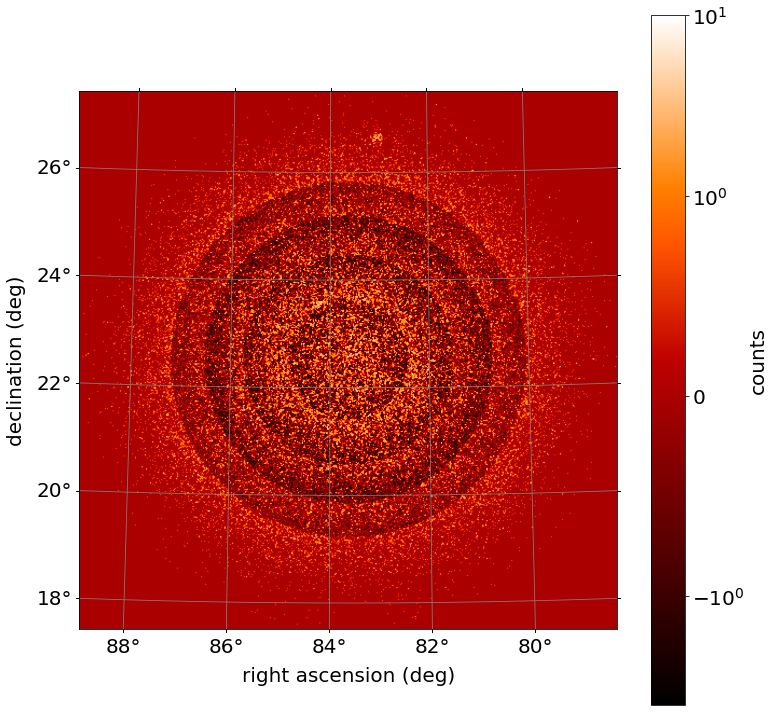

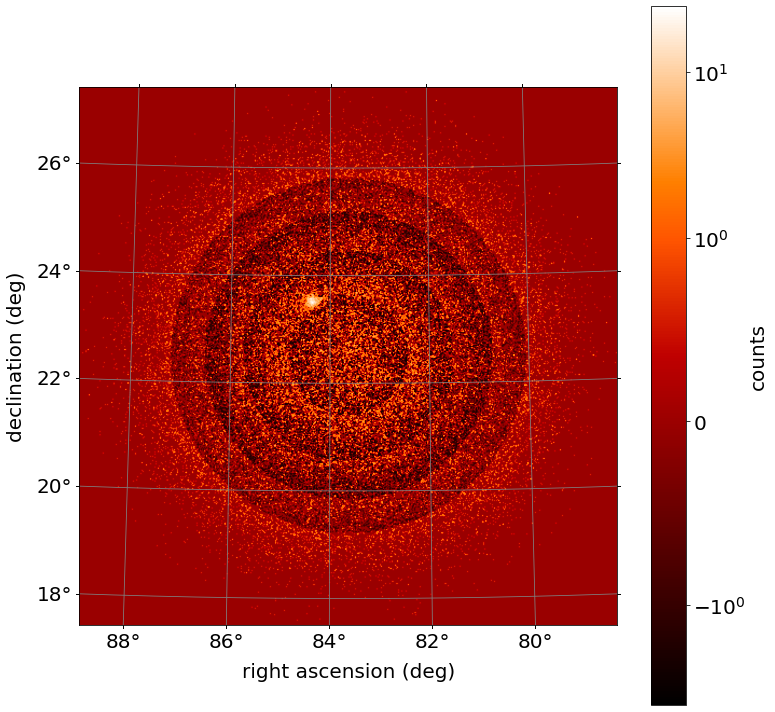

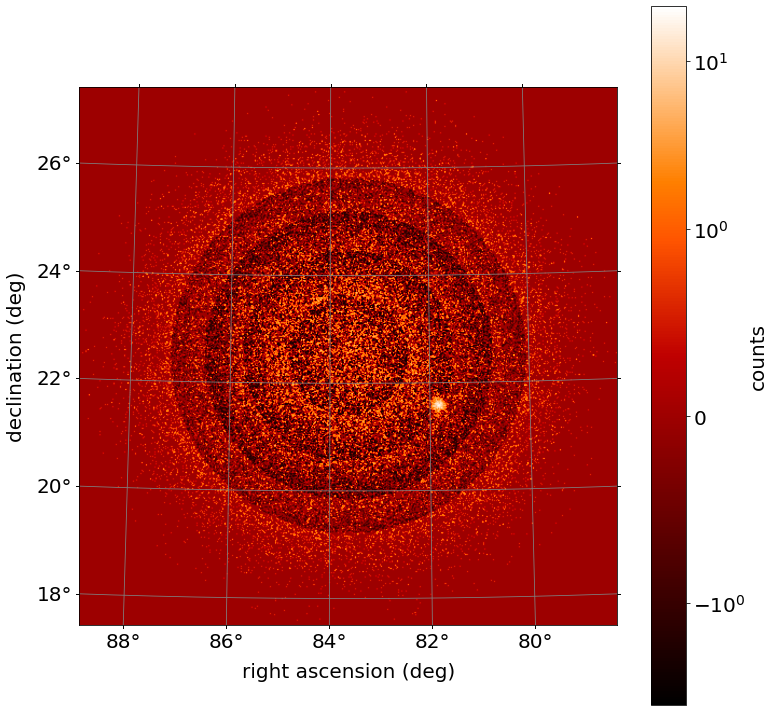

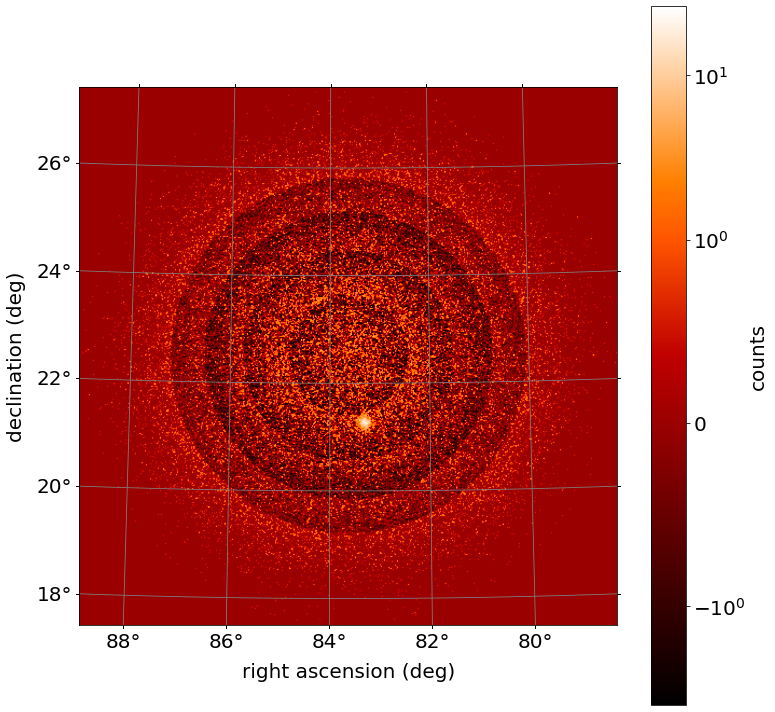

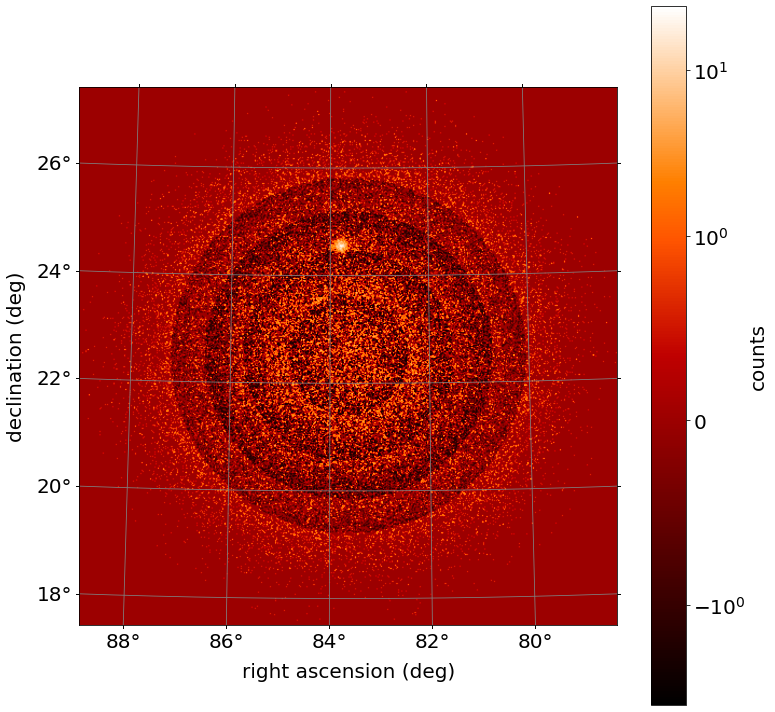

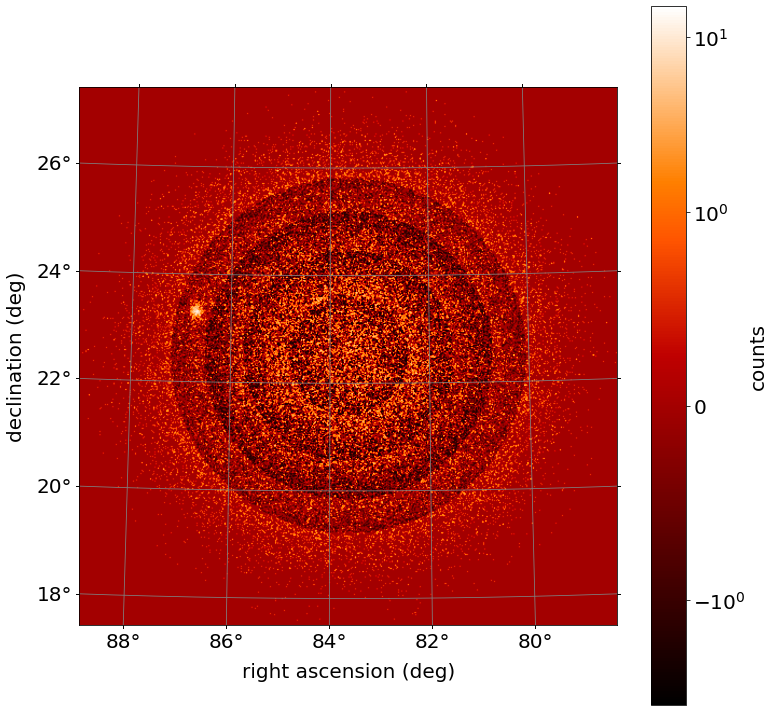

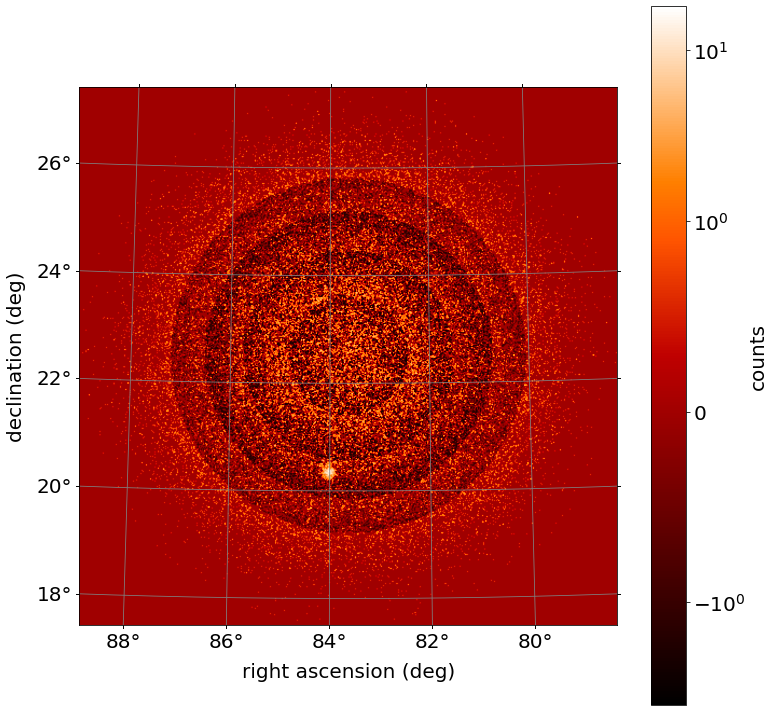

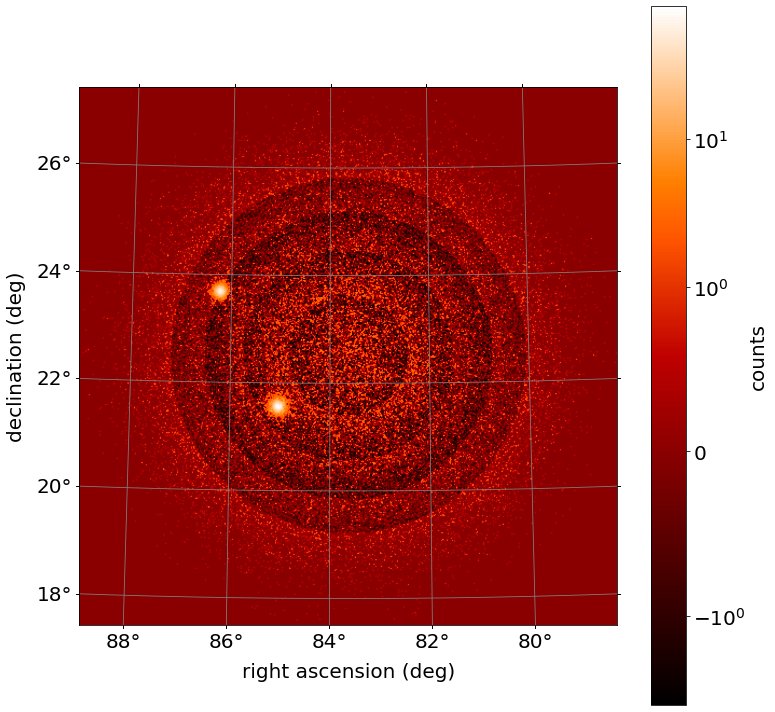

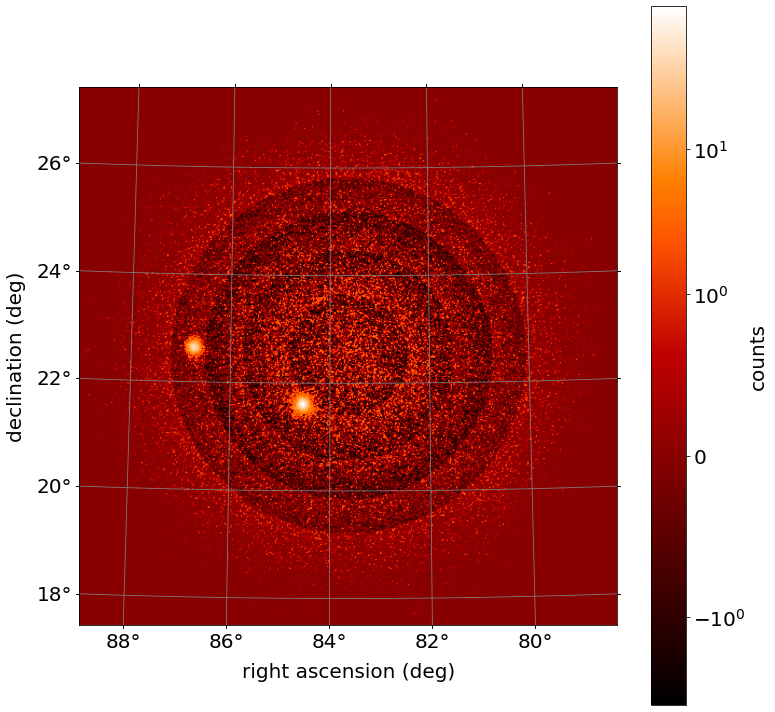

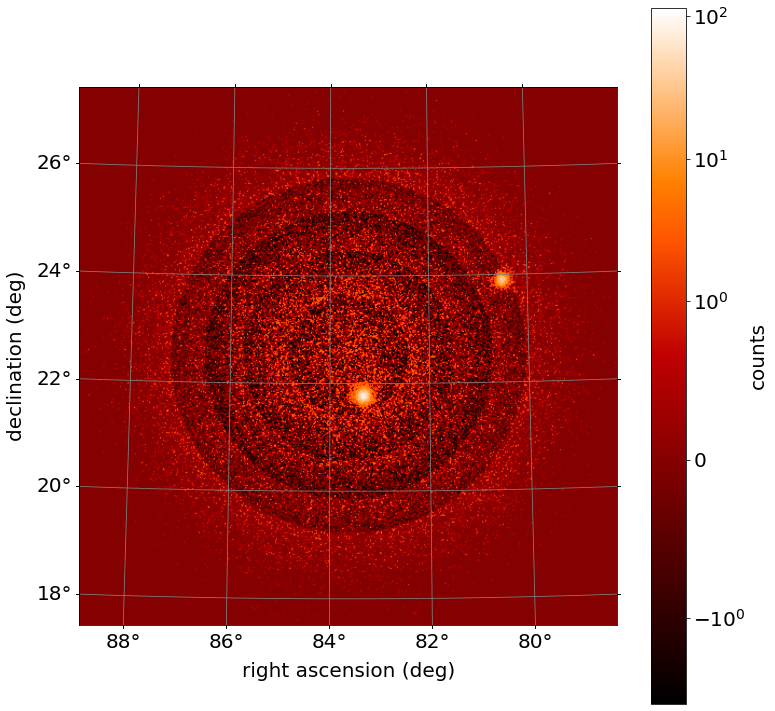

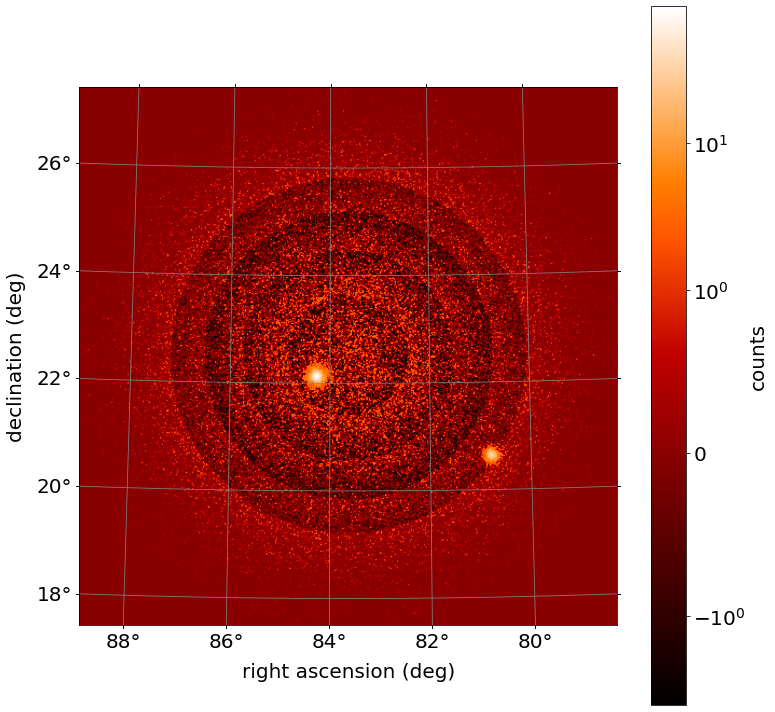

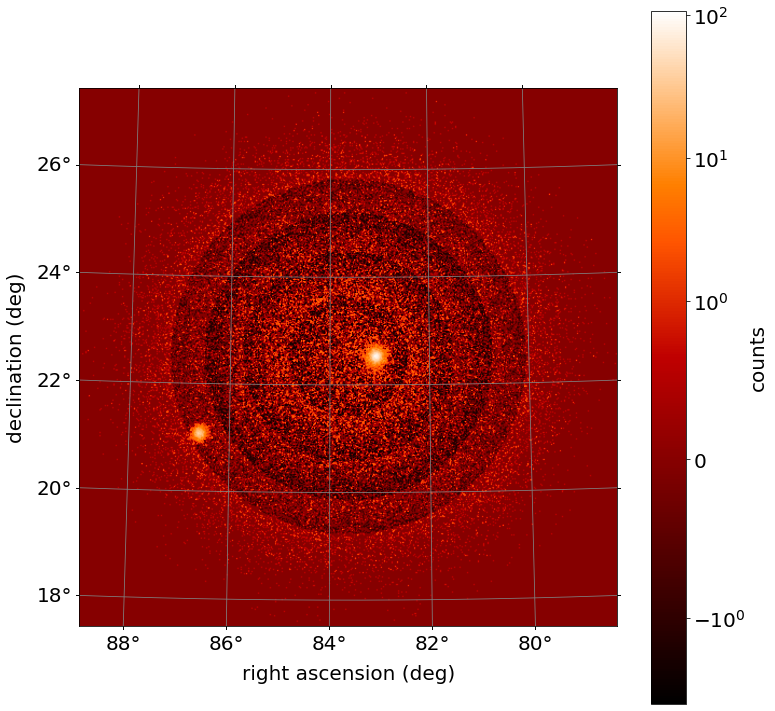

In [118]:
#print(dataset[0])
for skymap,wcs,source_position in dataset:
    plot_skymap(skymap)

In [122]:
skymap=dataset[5][0]


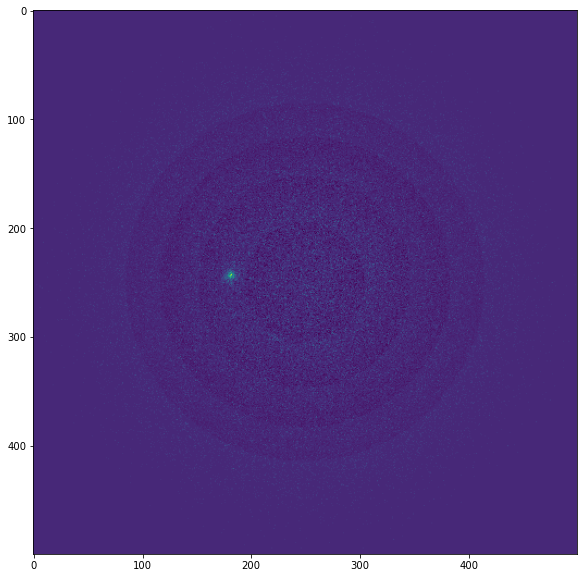

In [123]:
plt.figure(figsize=(10,10))
plt.imshow(skymap)
plt.show()


In [124]:
threshold = 100
for threshold in range(0,5,1):
    binary_skymap = np.copy(skymap)
    binary_skymap[skymap <= threshold] = 255
    binary_skymap[skymap > threshold] = 0
    
    
    skymap_filtered = cv2.medianBlur(binary_skymap, 3)

    plt.figure(figsize=(10,10))
    plt.imshow(skymap_filtered)
    plt.show()


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/median_blur.simd.hpp:975: error: (-210:Unsupported format or combination of formats)  in function 'medianBlur'
